<a href="https://colab.research.google.com/github/Andyqballer/HomeWork6-Ml/blob/main/HomeWork6Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Problem 1.a - Training Simple Model (1 hidden layer)
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.8330 - mae: 1.0417 - val_loss: 2.3735 - val_mae: 1.1489
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7439 - mae: 0.9918 - val_loss: 2.1808 - val_mae: 1.0955
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3692 - mae: 0.8970 - val_loss: 2.0232 - val_mae: 1.0523
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4331 - mae: 0.9048 - val_loss: 1.8866 - val_mae: 1.0150
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3390 - mae: 0.8779 - val_loss: 1.7671 - val_mae: 0.9806
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1274 - mae: 0.7866 - val_loss: 1.6737 - val_mae: 0.9510
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0426 - mae: 0.7658 - val_loss: 1.5902 - val_mae: 0.9236
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1103 - mae: 0.7727 - val_loss: 1.5141 - val_mae: 0.8987
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8898 - mae: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.1467 - mae: 0.8064 - val_loss: 1.7771 - val_mae: 1.0090
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0333 - mae: 0.7499 - val_loss: 1.5924 - val_mae: 0.9589
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8764 - mae: 0.7127 - val_loss: 1.4599 - val_mae: 0.9157
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8852 - mae: 0.6851 - val_loss: 1.3423 - val_mae: 0.8694
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7675 - mae: 0.6275 - val_loss: 1.2349 - val_mae: 0.8202
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6929 - mae: 0.5866 - val_loss: 1.1341 - val_mae: 0.7766
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5701 - mae: 0.5439 - val_loss: 1.0422 - val_mae: 0.7376
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5861 - mae: 0.5410 - val_loss: 0.9530 - val_mae: 0.7008
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5013 - mae: 0.

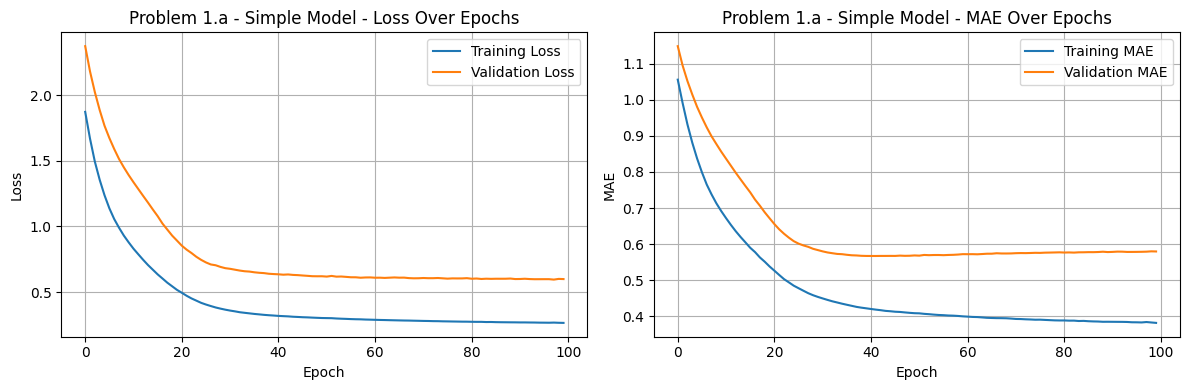

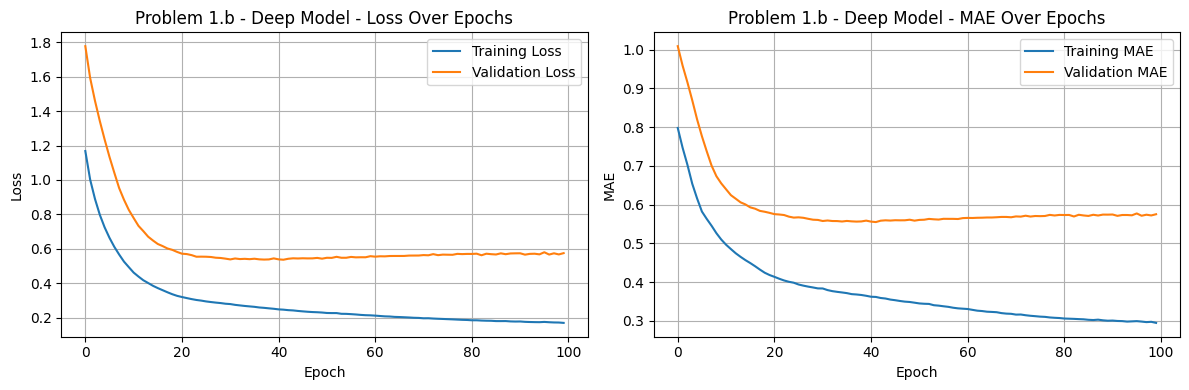

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time
import matplotlib.pyplot as plt

# ================== Problem 1.a ===================
# Data preprocessing function that handles the 80-20 split requirement
def prepare_data(data_path):
    """
    Prepare data for neural network training with 80-20 split as required in Problem 1.a
    Includes data normalization which is crucial for neural network performance
    """
    # Load the housing dataset
    data = pd.read_csv(data_path)

    # Convert binary columns to numeric
    binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                     'airconditioning', 'prefarea']
    for col in binary_columns:
        data[col] = data[col].map({'yes': 1, 'no': 0})

    # Convert furnishing status using label encoding
    le = LabelEncoder()
    data['furnishingstatus'] = le.fit_transform(data['furnishingstatus'])

    # Separate features and target
    X = data.drop(['price'], axis=1)
    y = data['price']

    # Implementation of 80-20 split as required in Problem 1.a
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features for better neural network performance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Scale the target variable (important for housing prices)
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).ravel()

    return X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled, y_scaler

# Problem 1.a implementation: Single hidden layer with 8 nodes
def create_simple_model(input_dim):
    """
    Creates the neural network architecture specified in Problem 1.a:
    - One hidden layer with 8 nodes
    - Fully connected architecture
    - ReLU activation for hidden layer
    """
    model = Sequential([
        Dense(8, activation='relu', input_dim=input_dim),  # Single hidden layer with 8 nodes
        Dense(1)  # Output layer for price prediction
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# ================== Problem 1.b ===================
# Implementation of the extended network with two additional hidden layers
def create_deep_model(input_dim):
    """
    Creates the extended neural network architecture specified in Problem 1.b:
    - Three hidden layers (16, 8, 4 nodes)
    - Fully connected architecture
    - ReLU activation for all hidden layers
    """
    model = Sequential([
        Dense(16, activation='relu', input_dim=input_dim),  # First hidden layer
        Dense(8, activation='relu'),                        # Second hidden layer
        Dense(4, activation='relu'),                        # Third hidden layer
        Dense(1)                                           # Output layer
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Training and evaluation function for both parts a and b
def train_and_evaluate(model, X_train, X_val, y_train, y_val, y_scaler, epochs=100):
    """
    Trains and evaluates the model, collecting metrics required by both problems:
    - Training time
    - Training loss
    - Evaluation accuracy
    - Checks for overfitting (Problem 1.b requirement)
    """
    # Measure training time as required
    start_time = time.time()

    # Train the model and collect history for overfitting analysis
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=32,
        verbose=1
    )

    training_time = time.time() - start_time

    # Calculate predictions and transform back to original scale
    y_train_pred = model.predict(X_train, verbose=0)
    y_val_pred = model.predict(X_val, verbose=0)

    y_train_pred_orig = y_scaler.inverse_transform(y_train_pred)
    y_val_pred_orig = y_scaler.inverse_transform(y_val_pred)
    y_train_orig = y_scaler.inverse_transform(y_train.reshape(-1, 1))
    y_val_orig = y_scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate metrics for comparison with linear regression and SVR
    train_mse = mean_squared_error(y_train_orig, y_train_pred_orig)
    val_mse = mean_squared_error(y_val_orig, y_val_pred_orig)
    train_r2 = r2_score(y_train_orig, y_train_pred_orig)
    val_r2 = r2_score(y_val_orig, y_val_pred_orig)

    return {
        'training_time': training_time,
        'train_mse': train_mse,
        'val_mse': val_mse,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'history': history.history
    }

# Visualization function to help identify overfitting (Problem 1.b requirement)
def plot_training_history(history, title):
    """
    Plots training metrics to help identify overfitting:
    - Loss curves
    - MAE curves
    Diverging training and validation curves indicate overfitting
    """
    plt.figure(figsize=(12, 4))

    # Loss plot for overfitting analysis
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # MAE plot for model accuracy analysis
    plt.subplot(1, 2, 2)
    plt.plot(history['mae'], label='Training MAE')
    plt.plot(history['val_mae'], label='Validation MAE')
    plt.title(f'{title} - MAE Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main execution comparing both models
if __name__ == "__main__":
    # Load and prepare data
    X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled, y_scaler = prepare_data('/content/housing.csv')
    input_dim = X_train_scaled.shape[1]

    # Problem 1.a: Train and evaluate simple model
    print("\nProblem 1.a - Training Simple Model (1 hidden layer)")
    simple_model = create_simple_model(input_dim)
    simple_results = train_and_evaluate(simple_model, X_train_scaled, X_val_scaled,
                                      y_train_scaled, y_val_scaled, y_scaler, epochs=100)

    # Problem 1.b: Train and evaluate deep model
    print("\nProblem 1.b - Training Deep Model (3 hidden layers)")
    deep_model = create_deep_model(input_dim)
    deep_results = train_and_evaluate(deep_model, X_train_scaled, X_val_scaled,
                                    y_train_scaled, y_val_scaled, y_scaler, epochs=100)

    # Print comparative results for analysis
    print("\nProblem 1.a Results (Simple Model):")
    print(f"Training Time: {simple_results['training_time']:.2f} seconds")
    print(f"Training MSE: {simple_results['train_mse']:,.2f}")
    print(f"Validation MSE: {simple_results['val_mse']:,.2f}")
    print(f"Training R²: {simple_results['train_r2']:.4f}")
    print(f"Validation R²: {simple_results['val_r2']:.4f}")

    print("\nProblem 1.b Results (Deep Model):")
    print(f"Training Time: {deep_results['training_time']:.2f} seconds")
    print(f"Training MSE: {deep_results['train_mse']:,.2f}")
    print(f"Validation MSE: {deep_results['val_mse']:,.2f}")
    print(f"Training R²: {deep_results['train_r2']:.4f}")
    print(f"Validation R²: {deep_results['val_r2']:.4f}")

    # Plot training histories for both models
    plot_training_history(simple_results['history'], 'Problem 1.a - Simple Model')
    plot_training_history(deep_results['history'], 'Problem 1.b - Deep Model')